In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
    
    
%matplotlib inline

In [263]:
df = pd.read_csv('cardio_base.csv')

In [264]:
df2 = pd.read_csv('cardio_alco.csv')

In [265]:
df2.shape

(56903, 1)

In [266]:
#Split df2 into 22 columns
df2[['id', 'alco']]= df2['id;alco'].str.split(';', expand=True)

In [267]:
df2.head()

,id;alco,id,alco
0,44;0,44,0
1,45;0,45,0
2,46;0,46,0
3,47;0,47,0
4,49;0,49,0


In [268]:
df2.columns

Index(['id;alco', 'id', 'alco'], dtype='object')

In [269]:
df2.drop(['id;alco'], axis=1, inplace=True)

In [270]:
df2.id.unique()

array(['44', '45', '46', ..., '99951', '99952', '99954'], dtype=object)

In [271]:
##df2.rename(columns = {'id' :'alco', 'alco': 'id'}, inplace=True)

In [272]:
df2

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [273]:
df.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
0          0  18393       2     168    62.0    110     80            1      0
1          1  20228       1     156    85.0    140     90            3      0
2          2  18857       1     165    64.0    130     70            3      0
3          3  17623       2     169    82.0    150    100            1      0
4          4  17474       1     156    56.0    100     60            1      0
...      ...    ...     ...     ...     ...    ...    ...          ...    ...
69995  99993  19240       2     168    76.0    120     80            1      1
69996  99995  22601       1     158   126.0    140     90            2      0
69997  99996  19066       2     183   105.0    180     90            3      0
69998  99998  22431       1     163    72.0    135     80            1      0
69999  99999  20540       1     170    72.0    120     80            2      0

[70000 rows x 9 columns]>

In [274]:
#Summary stats
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [275]:
df2['id'] = pd.to_numeric(df['id'])

In [276]:
df2['id'].dtype

dtype('int64')

In [277]:
df['gender'] = df['gender'].astype('category')

In [278]:
df['gender'].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [279]:
#There are only two unique values in Smoke column
#Like inidcates a boolean value True/False 
df.smoke.unique()

array([0, 1], dtype=int64)

In [280]:
df['smoke'] = df['smoke'].astype('category')

In [281]:
#Merge the dataframes
df3 = pd.merge(df, df2, on='id', how='left')

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [282]:
df3['alco'].value_counts()

0    53862
1     3041
Name: alco, dtype: int64

In [283]:
#df3.to_csv('')

In [303]:
df3['id'] = df3['id'].astype(str)

In [304]:
df3.id.dtype 


dtype('O')

In [284]:
df3['age'] = (df3['age'] / 365).astype('int')

In [285]:
#There are only two unique values in Gender column
df3.gender.unique()

[2, 1]
Categories (2, int64): [1, 2]

In [286]:
df3['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

In [287]:
#There are only two unique values in Gender column
df3.smoke.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [288]:
df_corr = df3.corr()
df_corr

,id,age,height,weight,ap_hi,ap_lo,cholesterol
id,1.000000,0.003814,-0.003038,-0.001830,0.003356,-0.002529,0.006106
age,0.003814,1.000000,-0.081506,0.053561,0.020854,0.017620,0.154012
height,-0.003038,-0.081506,1.000000,0.290968,0.005488,0.006150,-0.050226
weight,-0.001830,0.053561,0.290968,1.000000,0.030702,0.043710,0.141768
ap_hi,0.003356,0.020854,0.005488,0.030702,1.000000,0.016086,0.023778
ap_lo,-0.002529,0.017620,0.006150,0.043710,0.016086,1.000000,0.024019
cholesterol,0.006106,0.154012,-0.050226,0.141768,0.023778,0.024019,1.000000


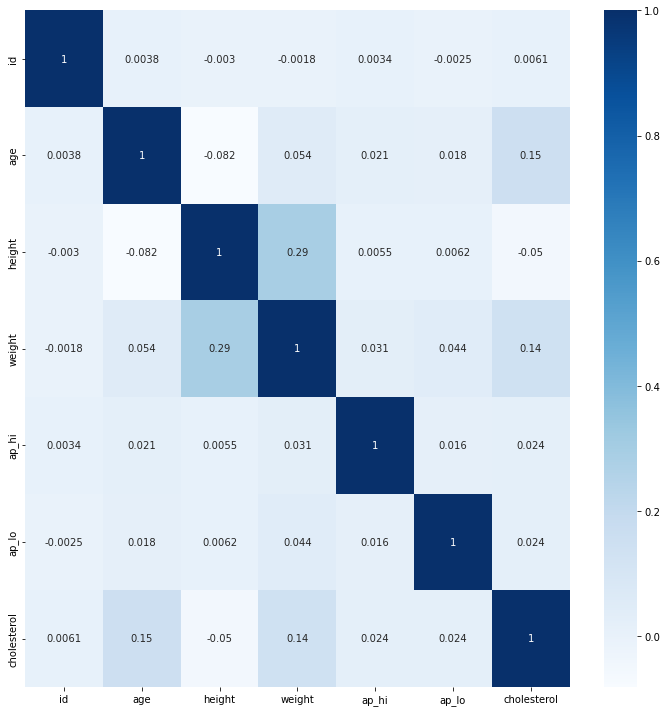

In [289]:
plt.figure(figsize=(10, 10))
sb.heatmap(df_corr, annot=True, cmap='Blues')
plt.tight_layout()

In [290]:
for i in list(df3.columns):
    print("{} ==> {}".format(i, df3[i].value_counts().shape[0]))

id ==> 70000
age ==> 28
gender ==> 2
height ==> 109
weight ==> 287
ap_hi ==> 153
ap_lo ==> 157
cholesterol ==> 3
smoke ==> 2
alco ==> 2


In [291]:
#Save DF to csv
df3.to_csv('cardio.csv', sep=',', encoding='utf-8')

In [292]:
cardio = pd.read_csv('cardio.csv')

In [293]:
cardio[cardio['alco']==1]


,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
30,30,42,50,1,155,105.0,120,80,3,0,1.0
67,67,90,60,2,171,97.0,150,100,3,1,1.0
69,69,94,57,1,157,53.0,110,70,1,0,1.0
75,75,104,56,1,158,75.0,130,90,1,0,1.0
102,102,137,46,1,168,77.0,100,70,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
56845,56845,81145,41,2,173,100.0,140,100,1,1,1.0
56851,56851,81154,53,1,148,48.0,110,70,1,0,1.0
56861,56861,81169,59,1,176,53.0,120,80,1,0,1.0
56886,56886,81205,58,1,161,61.0,140,90,2,0,1.0
